Import Function

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

Import Data

In [21]:
os.chdir('C:\\Users\\santa\\OneDrive\\Documents\\KMUTT-4\\Final_PJ\\Data')
df = pd.read_csv('Policy_rate_data.csv')
df.head()

,Date,Policy rate
0,29/2/2024,2.5
1,28/2/2024,2.5
2,27/2/2024,2.5
3,26/2/2024,2.5
4,25/2/2024,2.5


In [22]:
df.shape

(6968, 2)

In [23]:
df.isnull().sum()

Date           0
Policy rate    0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.dtypes

Date            object
Policy rate    float64
dtype: object

In [26]:
df.describe()

,Policy rate
count,6968.000000
mean,2.092028
std,1.129977
min,0.500000
25%,1.500000
50%,1.750000
75%,2.750000
max,5.000000


Data Processing

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df.set_index('Date',inplace = True)

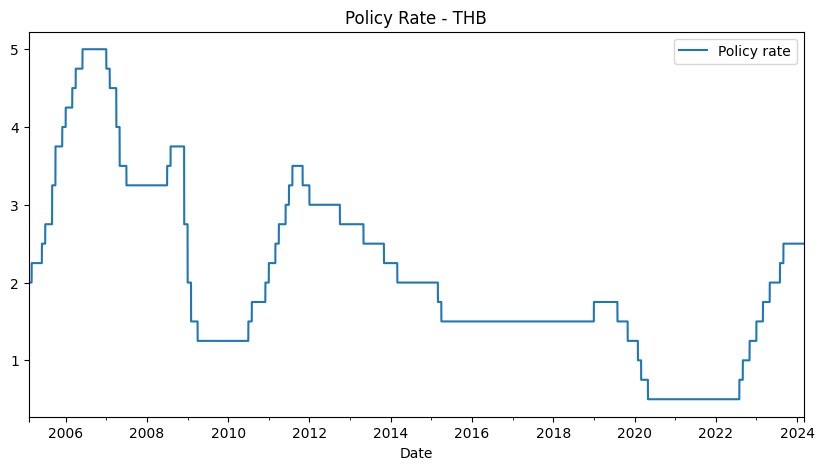

In [29]:
df.plot(figsize = (10,5))
plt.title('Policy Rate - THB')
#plt.savefig('Foreign Exchange Rate - THB to USD.png')
plt.show()

In [30]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  229


,Policy rate
Date,
2005-02-28,2.00
2005-03-31,2.25
2005-04-30,2.25
2005-05-31,2.25
2005-06-30,2.50


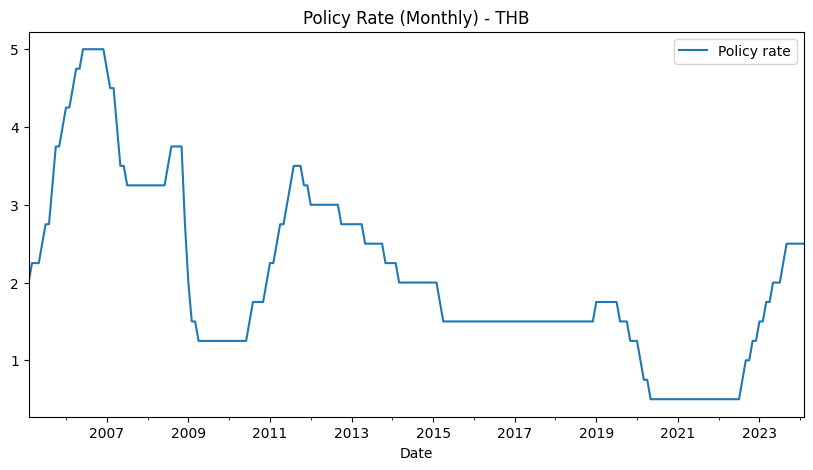

In [31]:
df_month.plot(figsize = (10,5))
plt.title('Policy Rate (Monthly) - THB')
#lt.savefig('Foregin Exchange Rate (Monthly) - THB to USD')
plt.show()

In [32]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  20


,Policy rate
Date,
2005-12-31,2.870509
2006-12-31,4.794521
2007-12-31,3.682877
2008-12-31,3.395492
2009-12-31,1.354110


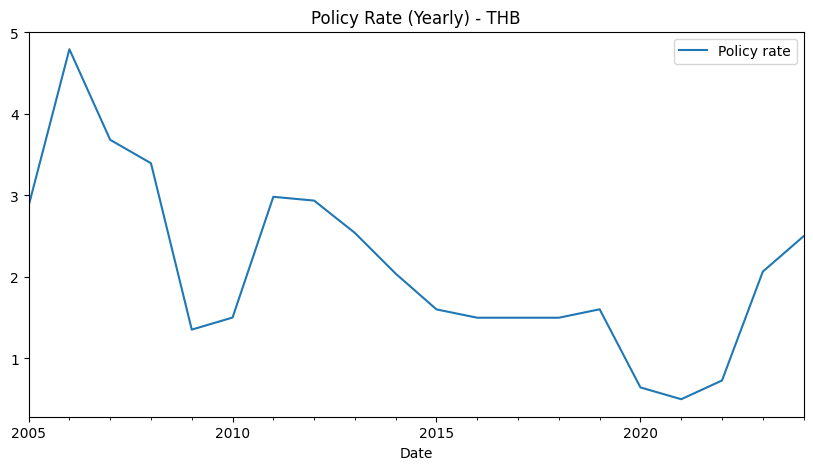

In [33]:
df_year.plot(figsize = (10,5))
plt.title('Policy Rate (Yearly) - THB')
#plt.savefig('Foregin Exchange Rate (Yearly) - THB to USD.png')
plt.show()

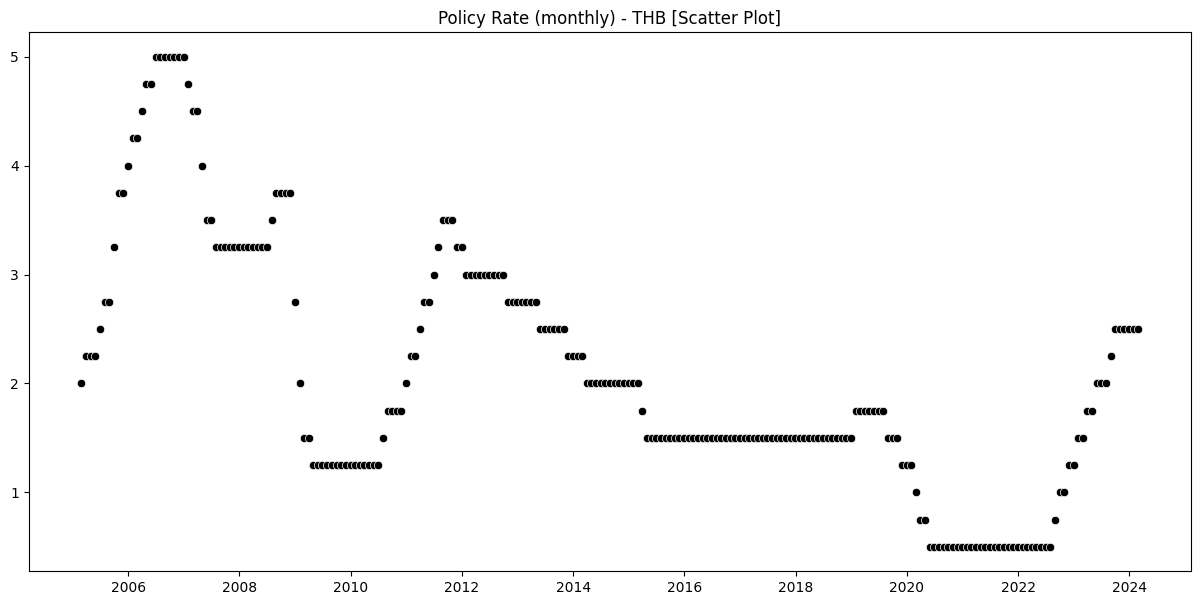

In [34]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x =  df_month.index.to_numpy().ravel() , y = df_month.values.ravel() , color = 'black')
plt.title('Policy Rate (monthly) - THB [Scatter Plot]')
#plt.savefig('Policy Rate (weekly) - THB to USD [Scatter Plot].png')
plt.show()

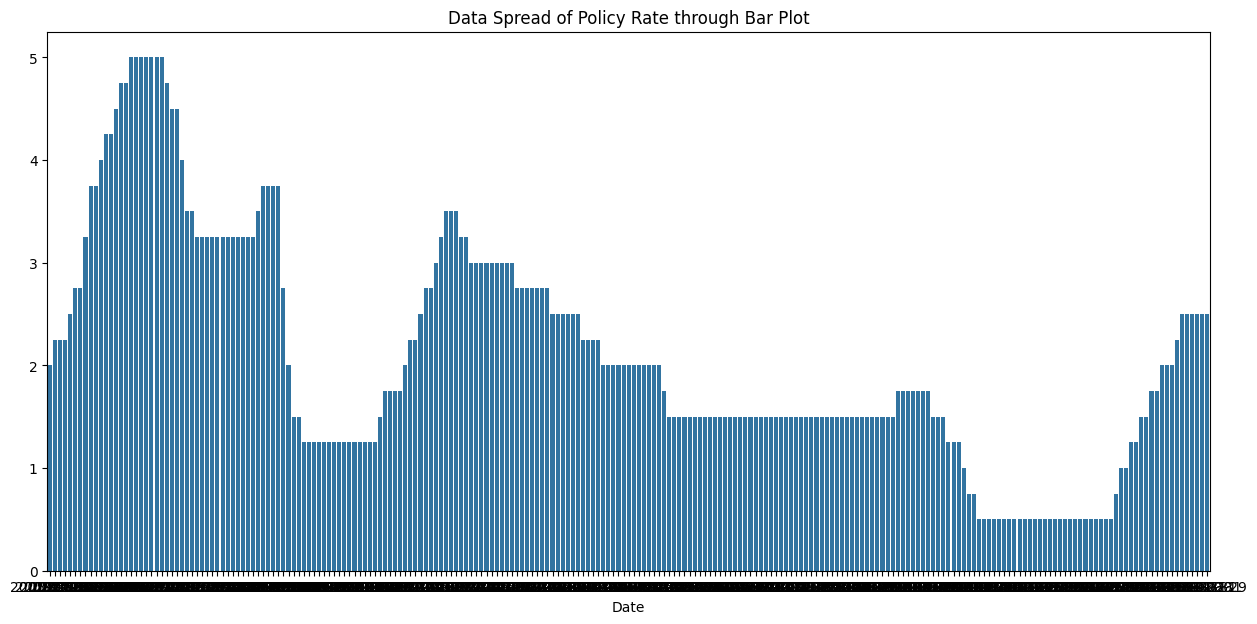

In [36]:
sns.barplot(data = df_month,x = df_month.index , y = df_month.values.ravel())
plt.title('Data Spread of Policy Rate through Bar Plot')
#plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

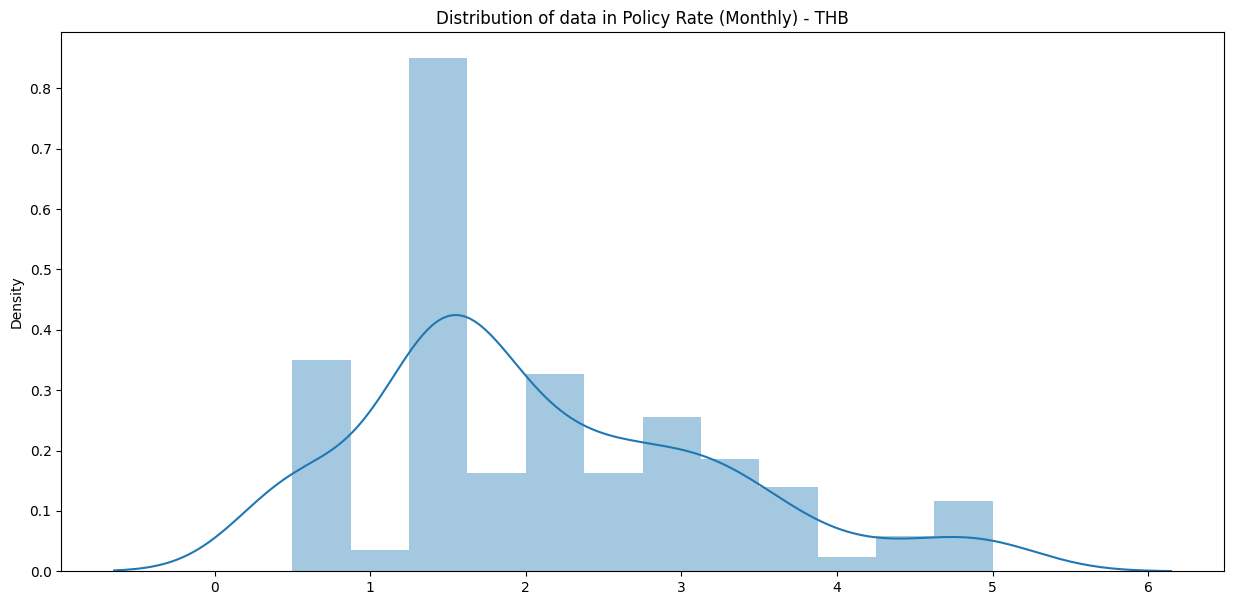

In [38]:
sns.distplot(df_month)
plt.title('Distribution of data in Policy Rate (Monthly) - THB')
#plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - THB to USD.png')
plt.show()

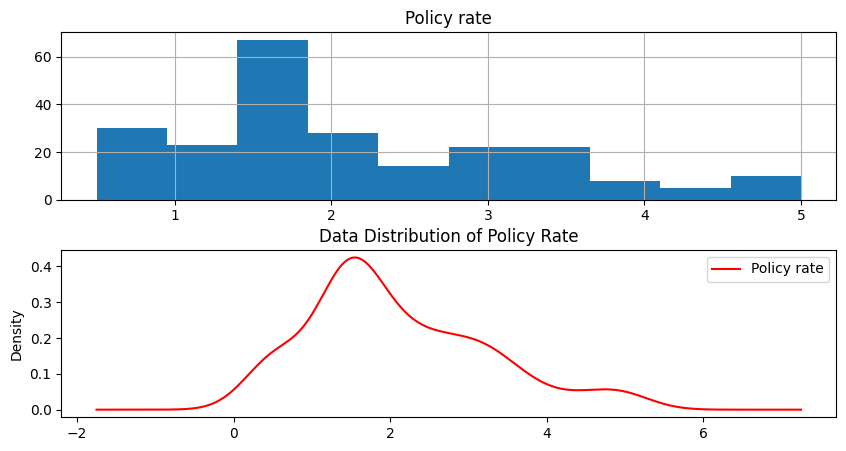

In [39]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_month.hist(ax = ax1)
df_month.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Policy Rate')
#plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

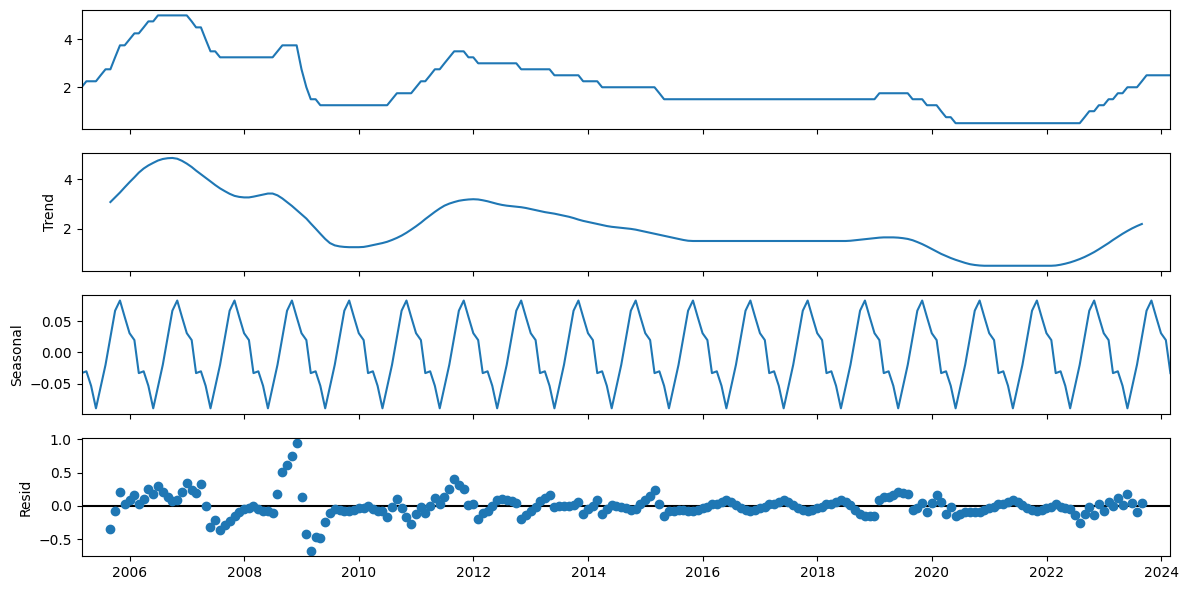

In [40]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month , period = 12 , model = 'additive')
decomposition.plot()
#plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

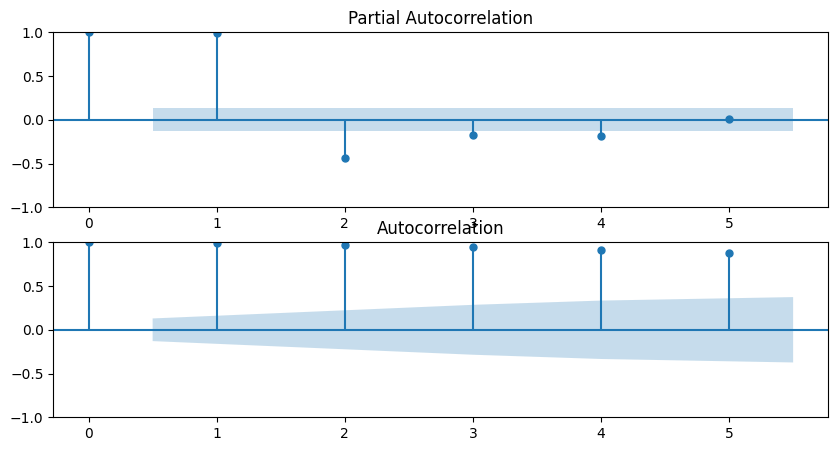

In [41]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_month , lags = 5 , ax = ax1)
ax2 = plot_acf(df_month , lags = 5 , ax = ax2)
#plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

Data Tranformation

In [42]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [43]:
adf_check(df_month)

Test Statistic                  -2.347868
p-value                          0.156994
Number of Lags Used              6.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [44]:
df1_month = df_month.diff().dropna()
print('Count of monthly Frist Diference', df1_month.shape[0])
df1_month.head()

Count of monthly Frist Diference 228


,Policy rate
Date,
2005-03-31,0.25
2005-04-30,0.00
2005-05-31,0.00
2005-06-30,0.25
2005-07-31,0.25


In [45]:
adf_check(df1_month)

Test Statistic                -5.696197e+00
p-value                        7.863958e-07
Number of Lags Used            4.000000e+00
Number of Observations Used    2.230000e+02
Critical Value (1%)           -3.460019e+00
Critical Value (5%)           -2.874590e+00
Critical Value (10%)          -2.573725e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


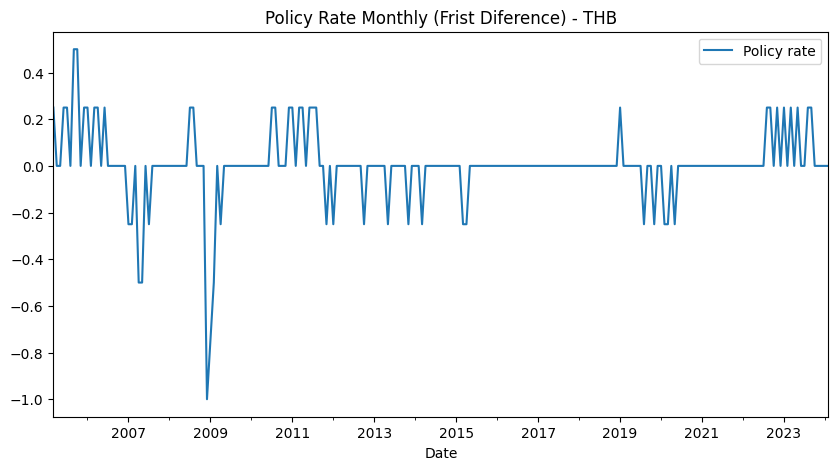

In [47]:
df1_month.plot(figsize = (10,5))
plt.title('Policy Rate Monthly (Frist Diference) - THB')
#plt.savefig('Policy Rate Monthly (Frist Diference) - THB.png')
plt.show()

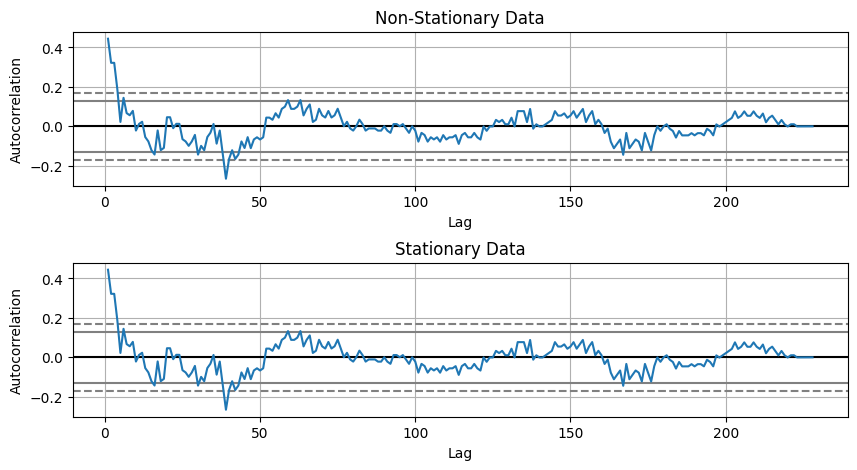

In [48]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df1_month , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_month , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

Model Fitting

In [52]:
model = auto_arima(df_month, m = 12, d = 1, seasonal = False, max_order = 8, test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-244.445, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-193.093, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-241.663, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-228.356, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-195.048, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-246.162, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-232.265, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-248.157, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-246.160, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-245.093, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-250.126, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-230.317, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-243.630, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-248.129, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 128.063
Date:                Sun, 24 Mar 2024   AIC                           -250.126
Time:                        15:25:24   BIC                           -239.838
Sample:                    02-28-2005   HQIC                          -245.975
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7627      0.064     11.979      0.000       0.638       0.887
ma.L1         -0.4105      0.083     -4.933      0.000      -0.574      -0.247
sigma2         0.0190      0.001     27.787      0.000       0.018       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1608.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model = ARIMA(df_month, order = (1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Policy rate   No. Observations:                  229
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 128.063
Date:                Sun, 24 Mar 2024   AIC                           -250.126
Time:                        15:26:41   BIC                           -239.838
Sample:                    02-28-2005   HQIC                          -245.975
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7627      0.064     11.979      0.000       0.638       0.887
ma.L1         -0.4105      0.083     -4.933      0.000      -0.574      -0.247
sigma2         0.0190      0.001     27.787      0.000       0.018       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1608.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

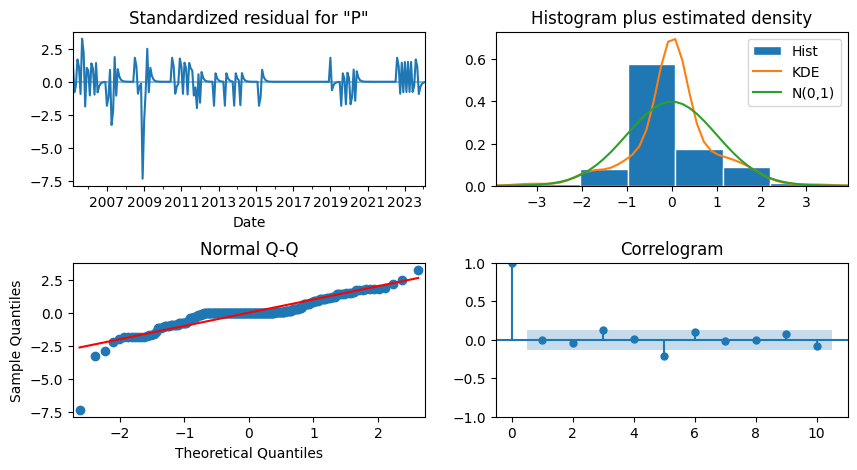

In [56]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Diagnostic Policy Rate plot of best model.png')
plt.show()

In [57]:
predictions = result.predict(typ = 'levels')

In [61]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['Policy rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['Policy rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['Policy rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['Policy rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['Policy rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 97.14 % 

Mean Squared Error :  0.03646305323365609 

Mean Absolute Error :  0.08546435912336092 

Root Mean Squared Error :  0.19095301315678706 

Mean Absolute Percentage Error : 4.31 %


In [62]:
Final_data = pd.concat([df_month,df1_month,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (monthly)','Monthly First Difference','Predicted Exchange Rate']
#Final_data.to_csv('Foreign Exchange Rate with Prediction (THB To USD).csv')
Final_data.head()

,Foreign Exchange Rate (monthly),Monthly First Difference,Predicted Exchange Rate
Date,,,
2005-02-28,2.00,NaN,0.000000
2005-03-31,2.25,0.25,2.000000
2005-04-30,2.25,0.00,2.361527
2005-05-31,2.25,0.00,2.294082
2005-06-30,2.50,0.25,2.267983


Model Testing

In [64]:
size = int(len(df_month)*0.80)
train , test = df_month[0:size]['Policy rate'] , df_month[size:(len(df_month))]['Policy rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  183
Counts of Train Data :  46


In [72]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 0.706916 , Actual = 0.500000
Predicted = 0.388000 , Actual = 0.500000
Predicted = 0.460768 , Actual = 0.500000
Predicted = 0.486411 , Actual = 0.500000
Predicted = 0.495275 , Actual = 0.500000
Predicted = 0.498352 , Actual = 0.500000
Predicted = 0.499424 , Actual = 0.500000
Predicted = 0.499799 , Actual = 0.500000
Predicted = 0.499930 , Actual = 0.500000
Predicted = 0.499975 , Actual = 0.500000
Predicted = 0.499991 , Actual = 0.500000
Predicted = 0.499997 , Actual = 0.500000
Predicted = 0.499999 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 0.500000 , Actual = 0.500000
Predicted = 

In [73]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 98.18 % 

Mean Squared Error :  0.010466082828162254 

Mean Absolute Error :  0.061499594342554385 

Root Mean Squared Error :  0.10230387494206783 

Mean Absolute Percentage Error : 5.34 %


In [74]:
predictions_df = pd.Series(prediction, index = test.index)

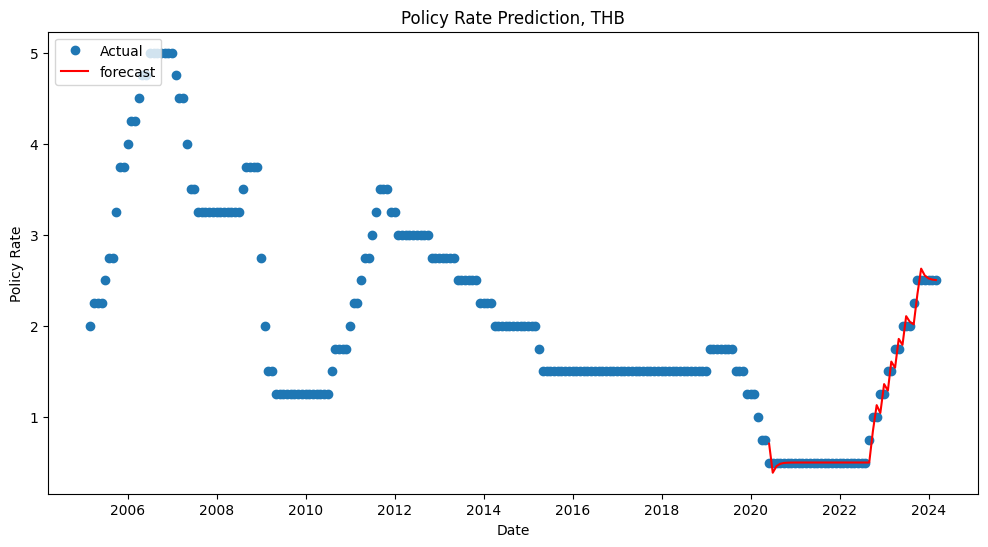

In [75]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Policy Rate Prediction, THB', xlabel='Date', ylabel='Policy Rate')
ax.plot(df_month, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
#plt.savefig('Foreign Exchange Rate Prediction - THB to USD.png')